# Homework 8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import numpy as np
import bqplot 

***Get Champaign's Parking Permit Spaces and Parking Meter Posts***

In [2]:
meter = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/29/query?outFields=*&where=1%3D1&f=geojson')

In [3]:
permit = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/31/query?outFields=*&where=1%3D1&f=geojson')

***draw the map***

In [4]:
import contextily as ctx

In [5]:
meter.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
meter = meter.to_crs(epsg=3857)

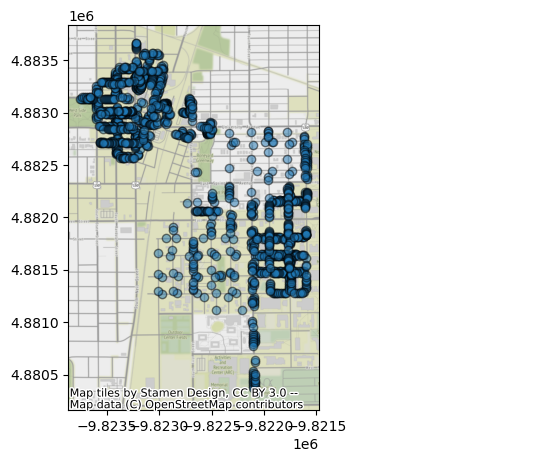

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
meter.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, crs=meter.crs)
plt.show()

In [8]:
permit.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
permit = permit.to_crs(epsg=3857)

In [10]:
permit.head()

,OBJECTID,STALL_NUME,NORTHING,EASTING,BLOCK_RANG,Front_t_Co,Rear_t_Con,st_No_Con,nd_No_Con,rd_No_Con,Notes,FACILITYID,Price,URL,PermitArea,geometry
0,1,13,1252437.643,1011662.665,1000 S Third St,,,,,,,1,$675,https://champaign.t2hosted.com/custom/spacelis...,Area 2,POINT (-9822310.226 4881315.737)
1,2,14,1252462.226,1011670.016,1000 S Third St,,,F11,F11,,2011,2,$675,https://champaign.t2hosted.com/custom/spacelis...,Area 2,POINT (-9822310.131 4881324.845)
2,3,15,1252522.307,1011656.193,1000 S Third St,F11,,F11,F11,,2011,3,$675,https://champaign.t2hosted.com/custom/spacelis...,Area 2,POINT (-9822310.313 4881349.328)
3,4,16,1252540.675,1011659.515,1000 S Third St,,,,,,,4,$675,https://champaign.t2hosted.com/custom/spacelis...,Area 2,POINT (-9822310.149 4881358.585)
4,5,17,1252594.288,1011671.754,1000 S Third St,,,,,,,5,$675,https://champaign.t2hosted.com/custom/spacelis...,Area 2,POINT (-9822310.564 4881383.844)


In [11]:
permit['PermitArea'].unique()

array(['Area 2', 'Area 4', 'Area 1', 'Area 3', 'Hickory St',
       'Randolph & Hill Lot'], dtype=object)

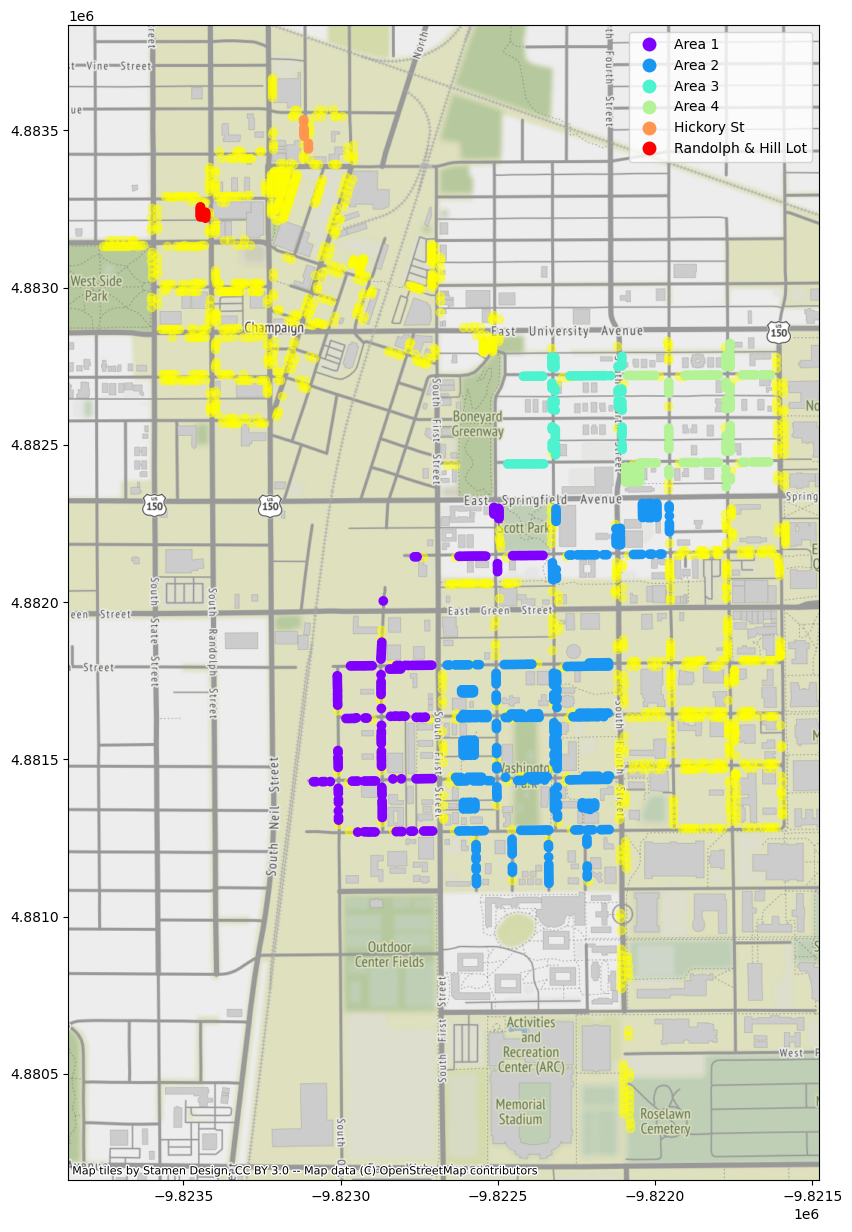

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
meter.plot(ax=ax,alpha=0.5,color='yellow')
permit.plot(column='PermitArea', ax=ax, cmap='rainbow', categorical=True, legend=True)
ctx.add_basemap(ax=ax,crs=meter.crs)
plt.show()

## interactive map

In [13]:
import ipywidgets

In [14]:
#3. decorate our (tested!) function with an ipywidgets.interact

@ipywidgets.interact(permit_area=permit['PermitArea'].unique())
def make_geo_plot(permit_area):
    permit_subset = permit.loc[permit['PermitArea']==permit_area]
    
    fig, ax = plt.subplots(figsize=(15,15))

    meter.plot(ax=ax, alpha=0.5, color='red')
    permit_subset.plot(column='PermitArea',ax=ax,cmap='rainbow',categorical=True, legend=True)
    ctx.add_basemap(ax=ax,crs=meter.crs)
    plt.show()
    

interactive(children=(Dropdown(description='permit_area', options=('Area 2', 'Area 4', 'Area 1', 'Area 3', 'Hi…

I used Champaign's Parking Permit Spaces and Parking Meter Posts geodata to show where we can park at Champaign and where to pay the parking fees. There are different rules for parking in different areas, some places only provide limited parking time, but others don't have restrictions. Therefore, the map shows the category of parking space and where to pay. I used epsg:3857 projection because it is Web Mercator projection used for display by many web-based mapping tools, including Google Maps and OpenStreetMap (according to Wikipedia). Most people nowadays use Google Maps and Apple Maps as navigation when they are driving, so epsg may fit drivers' navigation more than other projection systems. I think every driver will interested in this data visualization.

It is very interesting that there are much more meter posts than the spaces. And some meters locate far away from parking space.